In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Отлично, у нас нет пропусков, значит с ними работать в данном датасете не придется

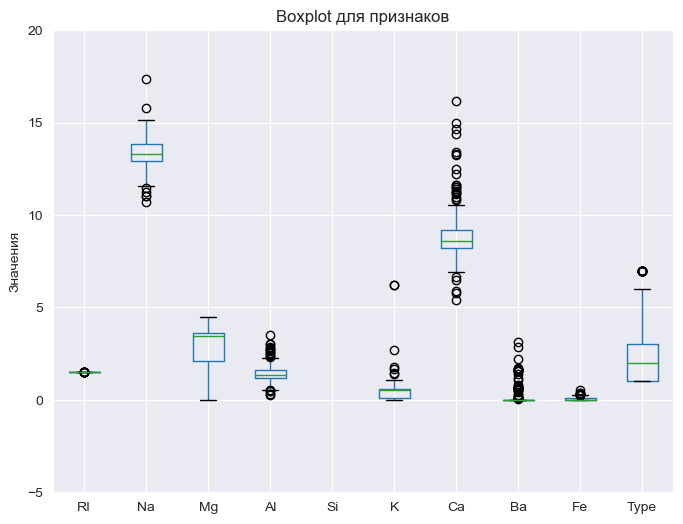

In [7]:
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title('Boxplot для признаков')
plt.ylabel('Значения')
plt.ylim(-5, 20)
plt.show()

In [8]:
numeric_features = data.columns

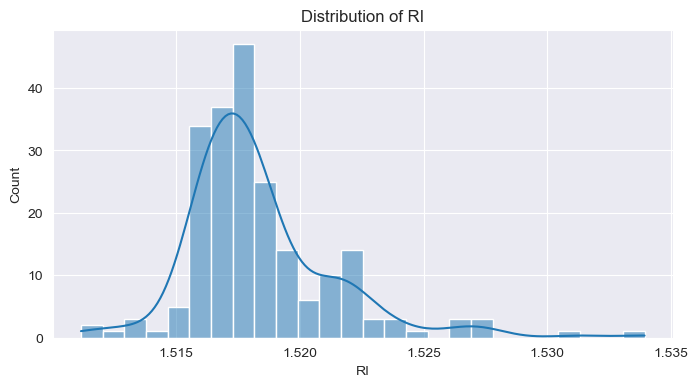

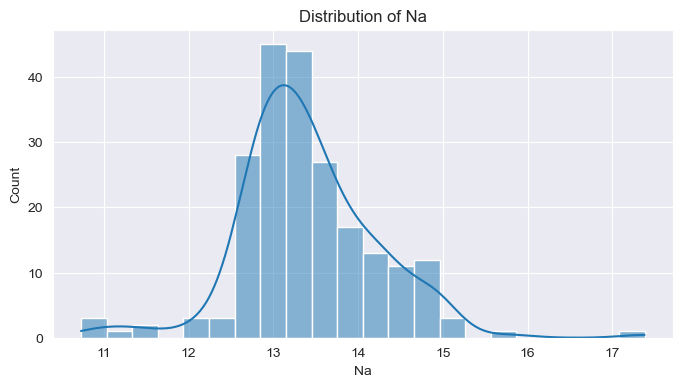

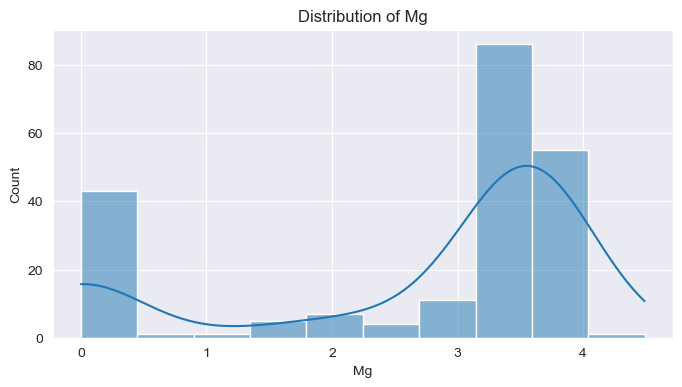

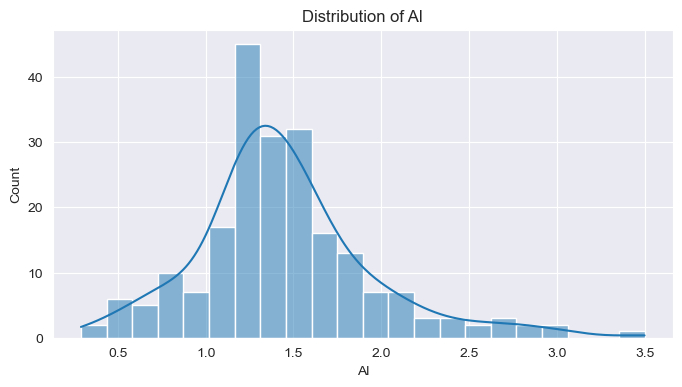

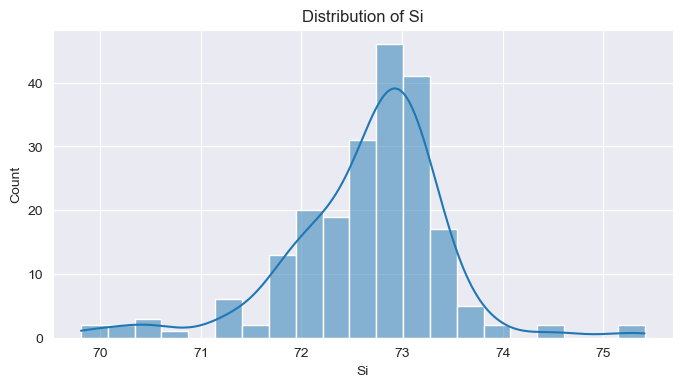

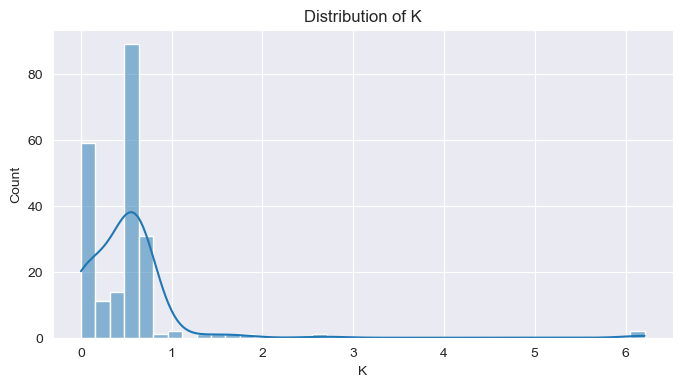

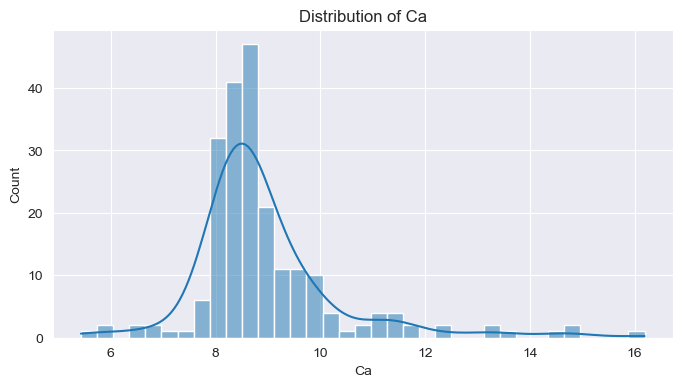

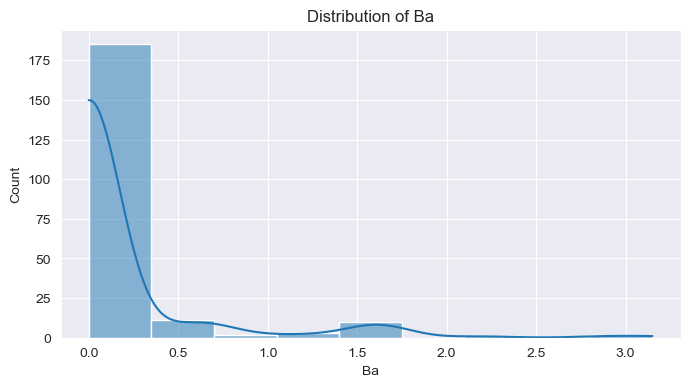

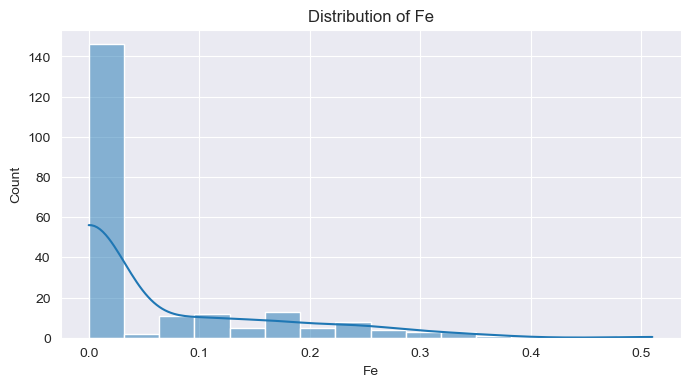

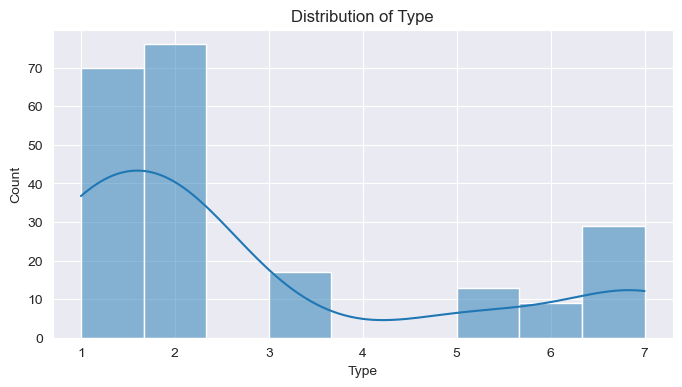

In [9]:
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [10]:
confusion_matrix = data.corr()

<AxesSubplot:>

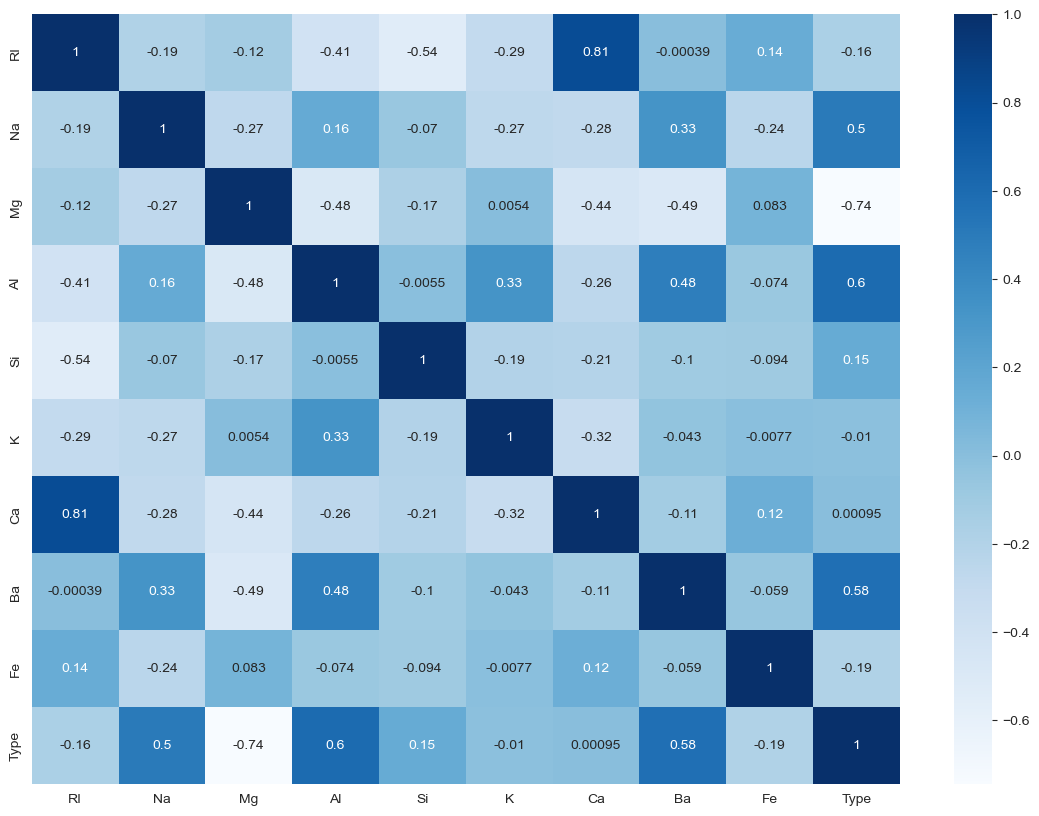

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

Mg, Al, Ba имеют довольно сильную корреляцию с целевой переменной 

In [12]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
y = data['Type']
X = data.drop(columns=['Type'])

In [14]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
model_rf = RandomForestClassifier(random_state=1)

In [17]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
y_pred_rf = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

In [19]:
acc_x_train = accuracy_score(y_train, y_pred_train)

In [20]:
acc_x_train

1.0

In [21]:
acc_x_test = accuracy_score(y_test, y_pred_rf)

In [22]:
acc_x_test

0.7441860465116279

In [23]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.69      0.75      0.72        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.73      0.74      0.72        43


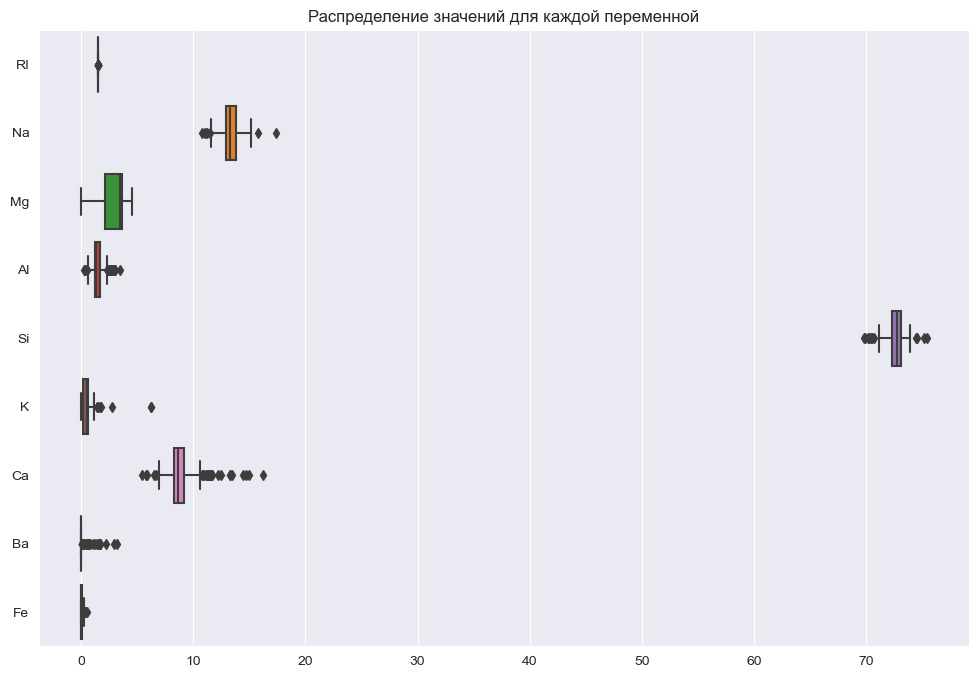

In [24]:
# визуализируем распределение значений для каждой переменной
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient="h")
plt.title("Распределение значений для каждой переменной")
plt.show()

In [25]:
# исследуем признаки на выбросы несколькими способами
# один из способов - использование межквартильного размаха (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_count = outliers.sum()
total_records = data.shape[0]
percent_outliers = (outliers_count / total_records) * 100
print("Общее количество выбросов:", outliers_count)
print("Процент удаленных записей от общего числа записей:", percent_outliers)


Общее количество выбросов: 78
Процент удаленных записей от общего числа записей: 36.44859813084112


In [26]:
# Удаляем выбросы
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

In [27]:
X_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0


In [28]:
X_cleaned.reset_index(drop=True, inplace=True)
y_cleaned.reset_index(drop=True, inplace=True)

In [29]:
X_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
131,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0
132,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0
133,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
134,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0


In [30]:
X_cleaned.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [31]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      136 non-null    float64
 1   Na      136 non-null    float64
 2   Mg      136 non-null    float64
 3   Al      136 non-null    float64
 4   Si      136 non-null    float64
 5   K       136 non-null    float64
 6   Ca      136 non-null    float64
 7   Ba      136 non-null    float64
 8   Fe      136 non-null    float64
dtypes: float64(9)
memory usage: 9.7 KB


In [32]:
X.shape

(214, 9)

In [33]:
X_cleaned.isna().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [34]:
X_cleaned.shape

(136, 9)

In [35]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [36]:
model_rf_cleaned = RandomForestClassifier(random_state=1)

In [37]:
model_rf_cleaned.fit(X_train_cleaned, y_train_cleaned)

RandomForestClassifier(random_state=1)

In [38]:
y_pred_cleaned = model_rf_cleaned.predict(X_test_cleaned)

In [39]:
y_pred_train_cleaned = model_rf_cleaned.predict(X_train_cleaned)

In [40]:
acc_xcl_train = accuracy_score(y_train_cleaned, y_pred_train_cleaned)

In [41]:
acc_xcl_train

1.0

In [42]:
acc_xcl_test = accuracy_score(y_test_cleaned, y_pred_cleaned)

In [43]:
acc_xcl_test

0.8214285714285714

In [44]:
print(classification_report(y_test_cleaned, y_pred_cleaned))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.75      1.00      0.86         9
           3       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         1

    accuracy                           0.82        28
   macro avg       0.65      0.55      0.56        28
weighted avg       0.81      0.82      0.79        28


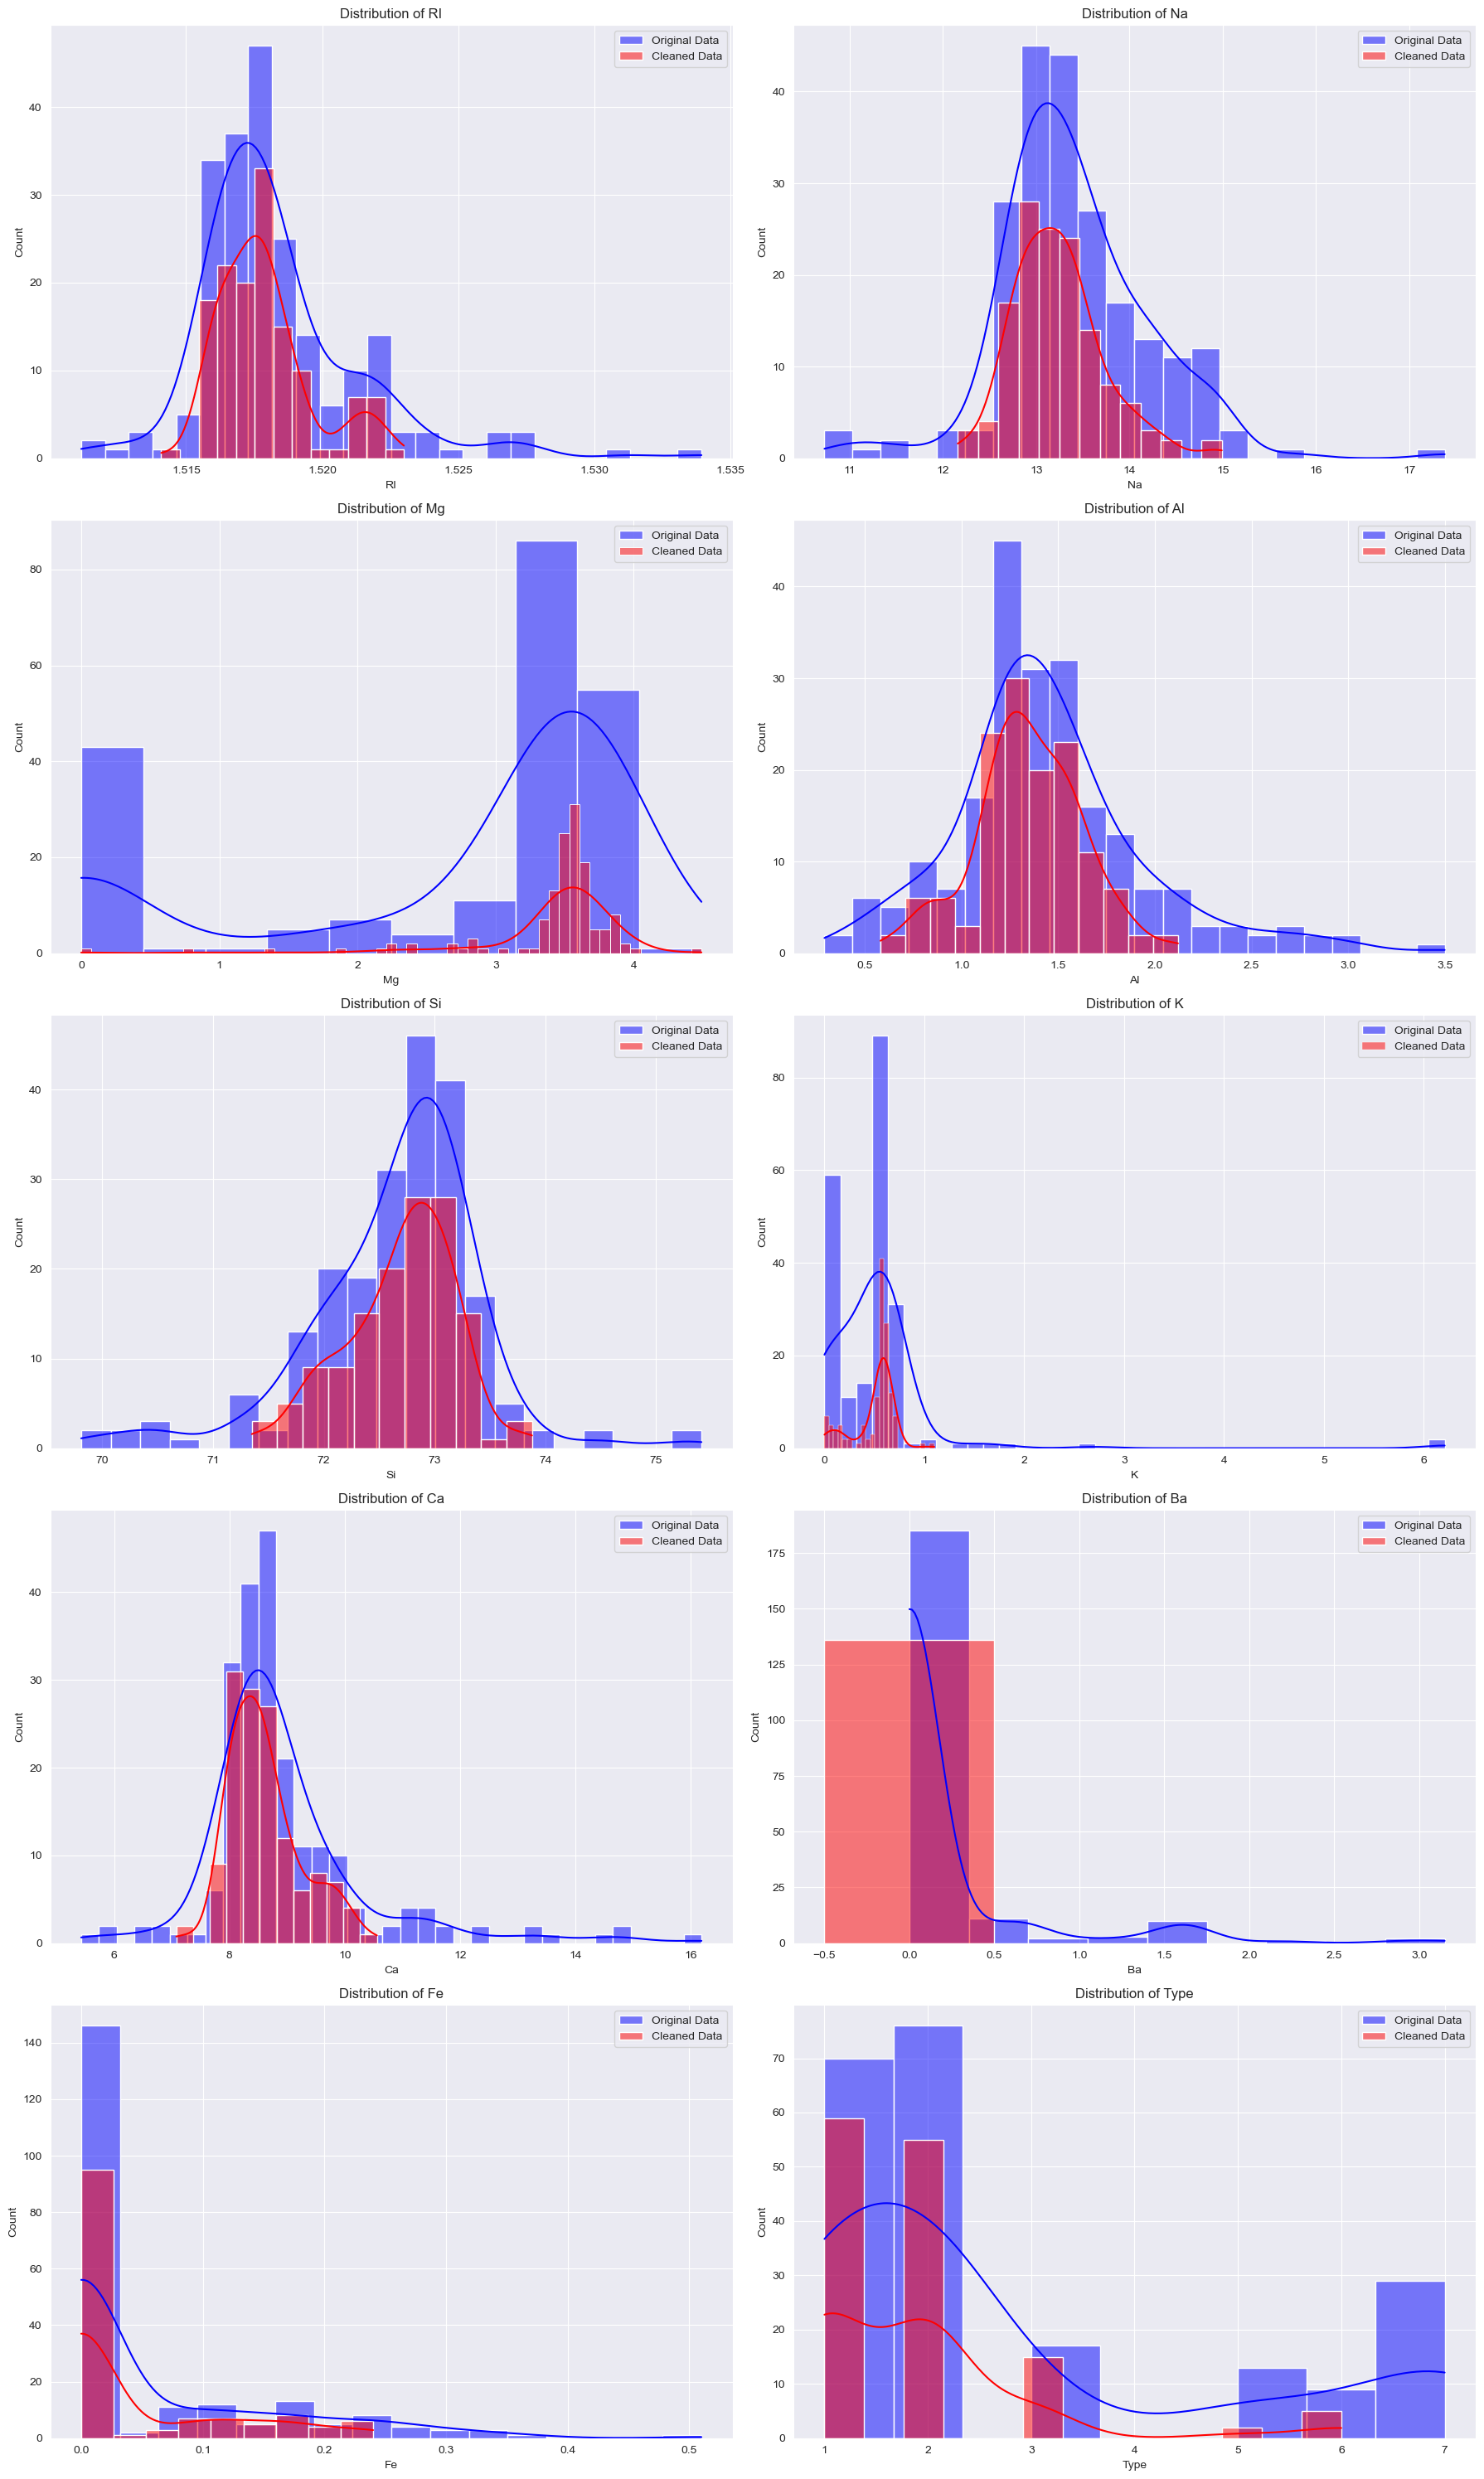

In [45]:
numeric_features = data.columns
num_cols = 2
num_rows = (len(numeric_features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, kde=True, color='blue', label='Original Data', alpha=0.5, ax=ax)
    sns.histplot(data=X_cleaned.join(y_cleaned), x=feature, kde=True, color='red', label='Cleaned Data', alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

for i in range(len(numeric_features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

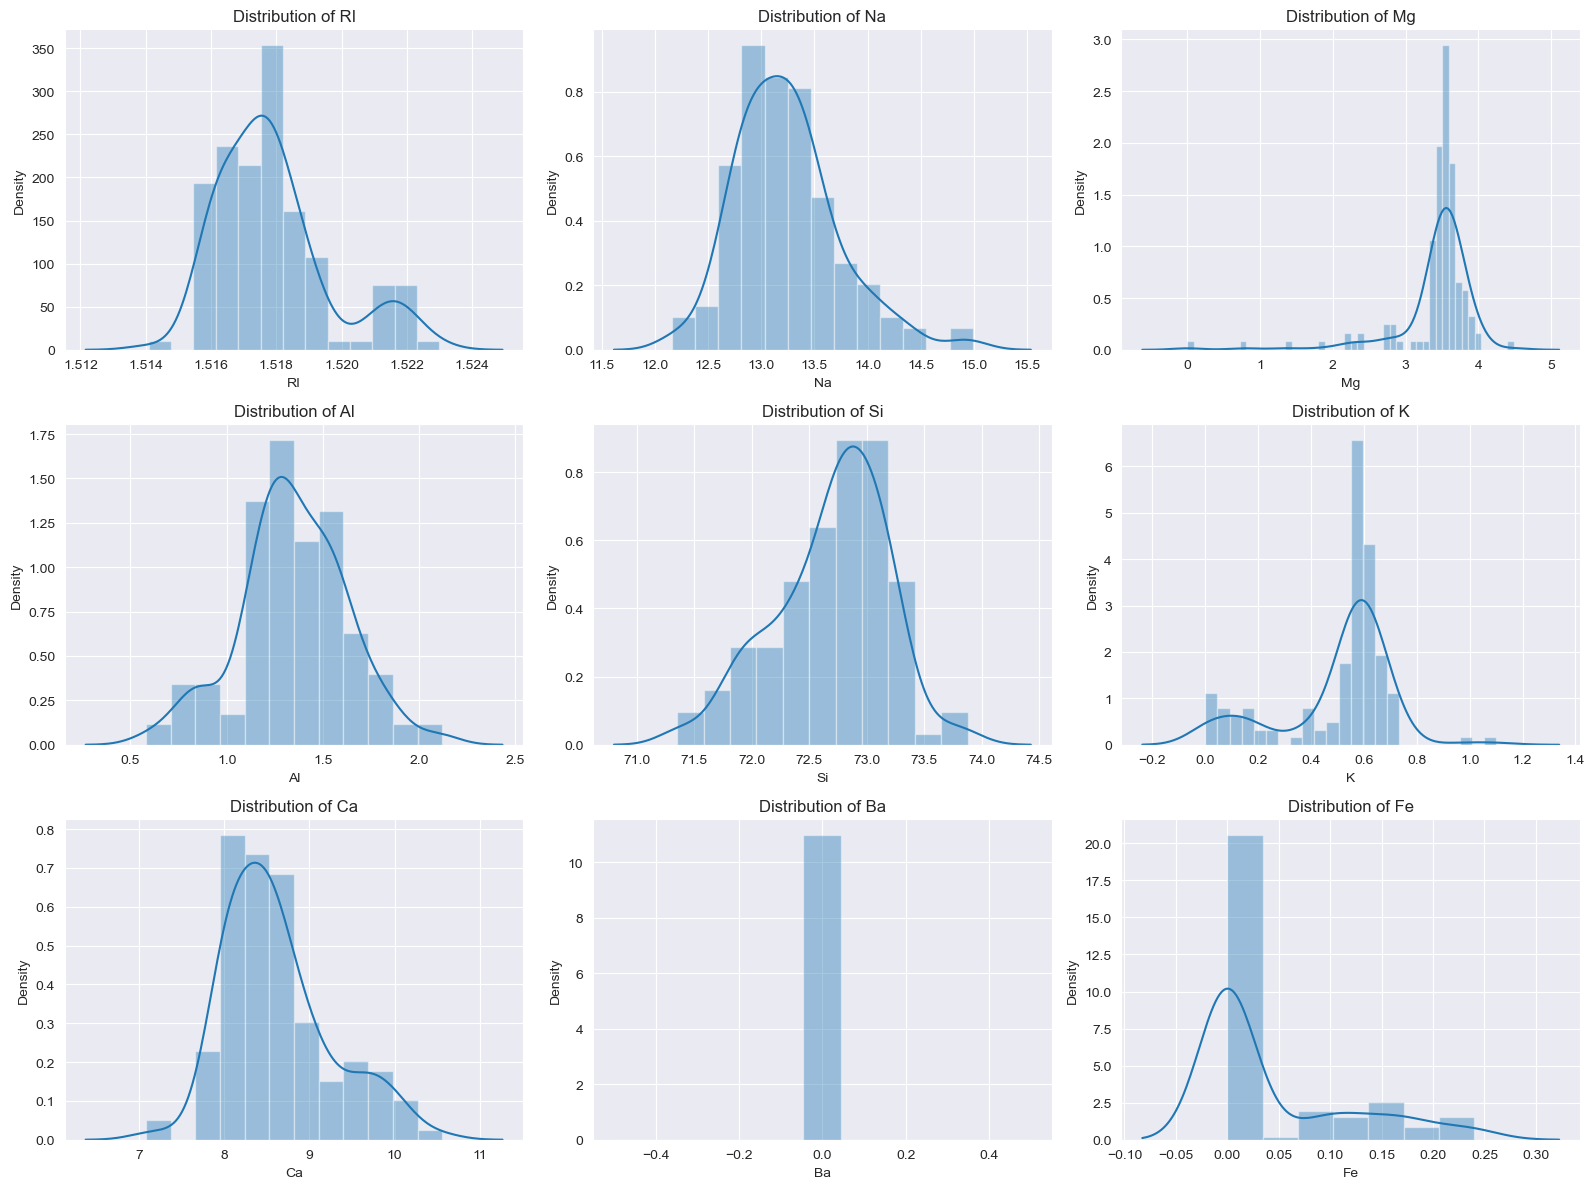

In [46]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(X_cleaned.columns):
    plt.subplot(3, 3, i+1)
    sns.distplot(X_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

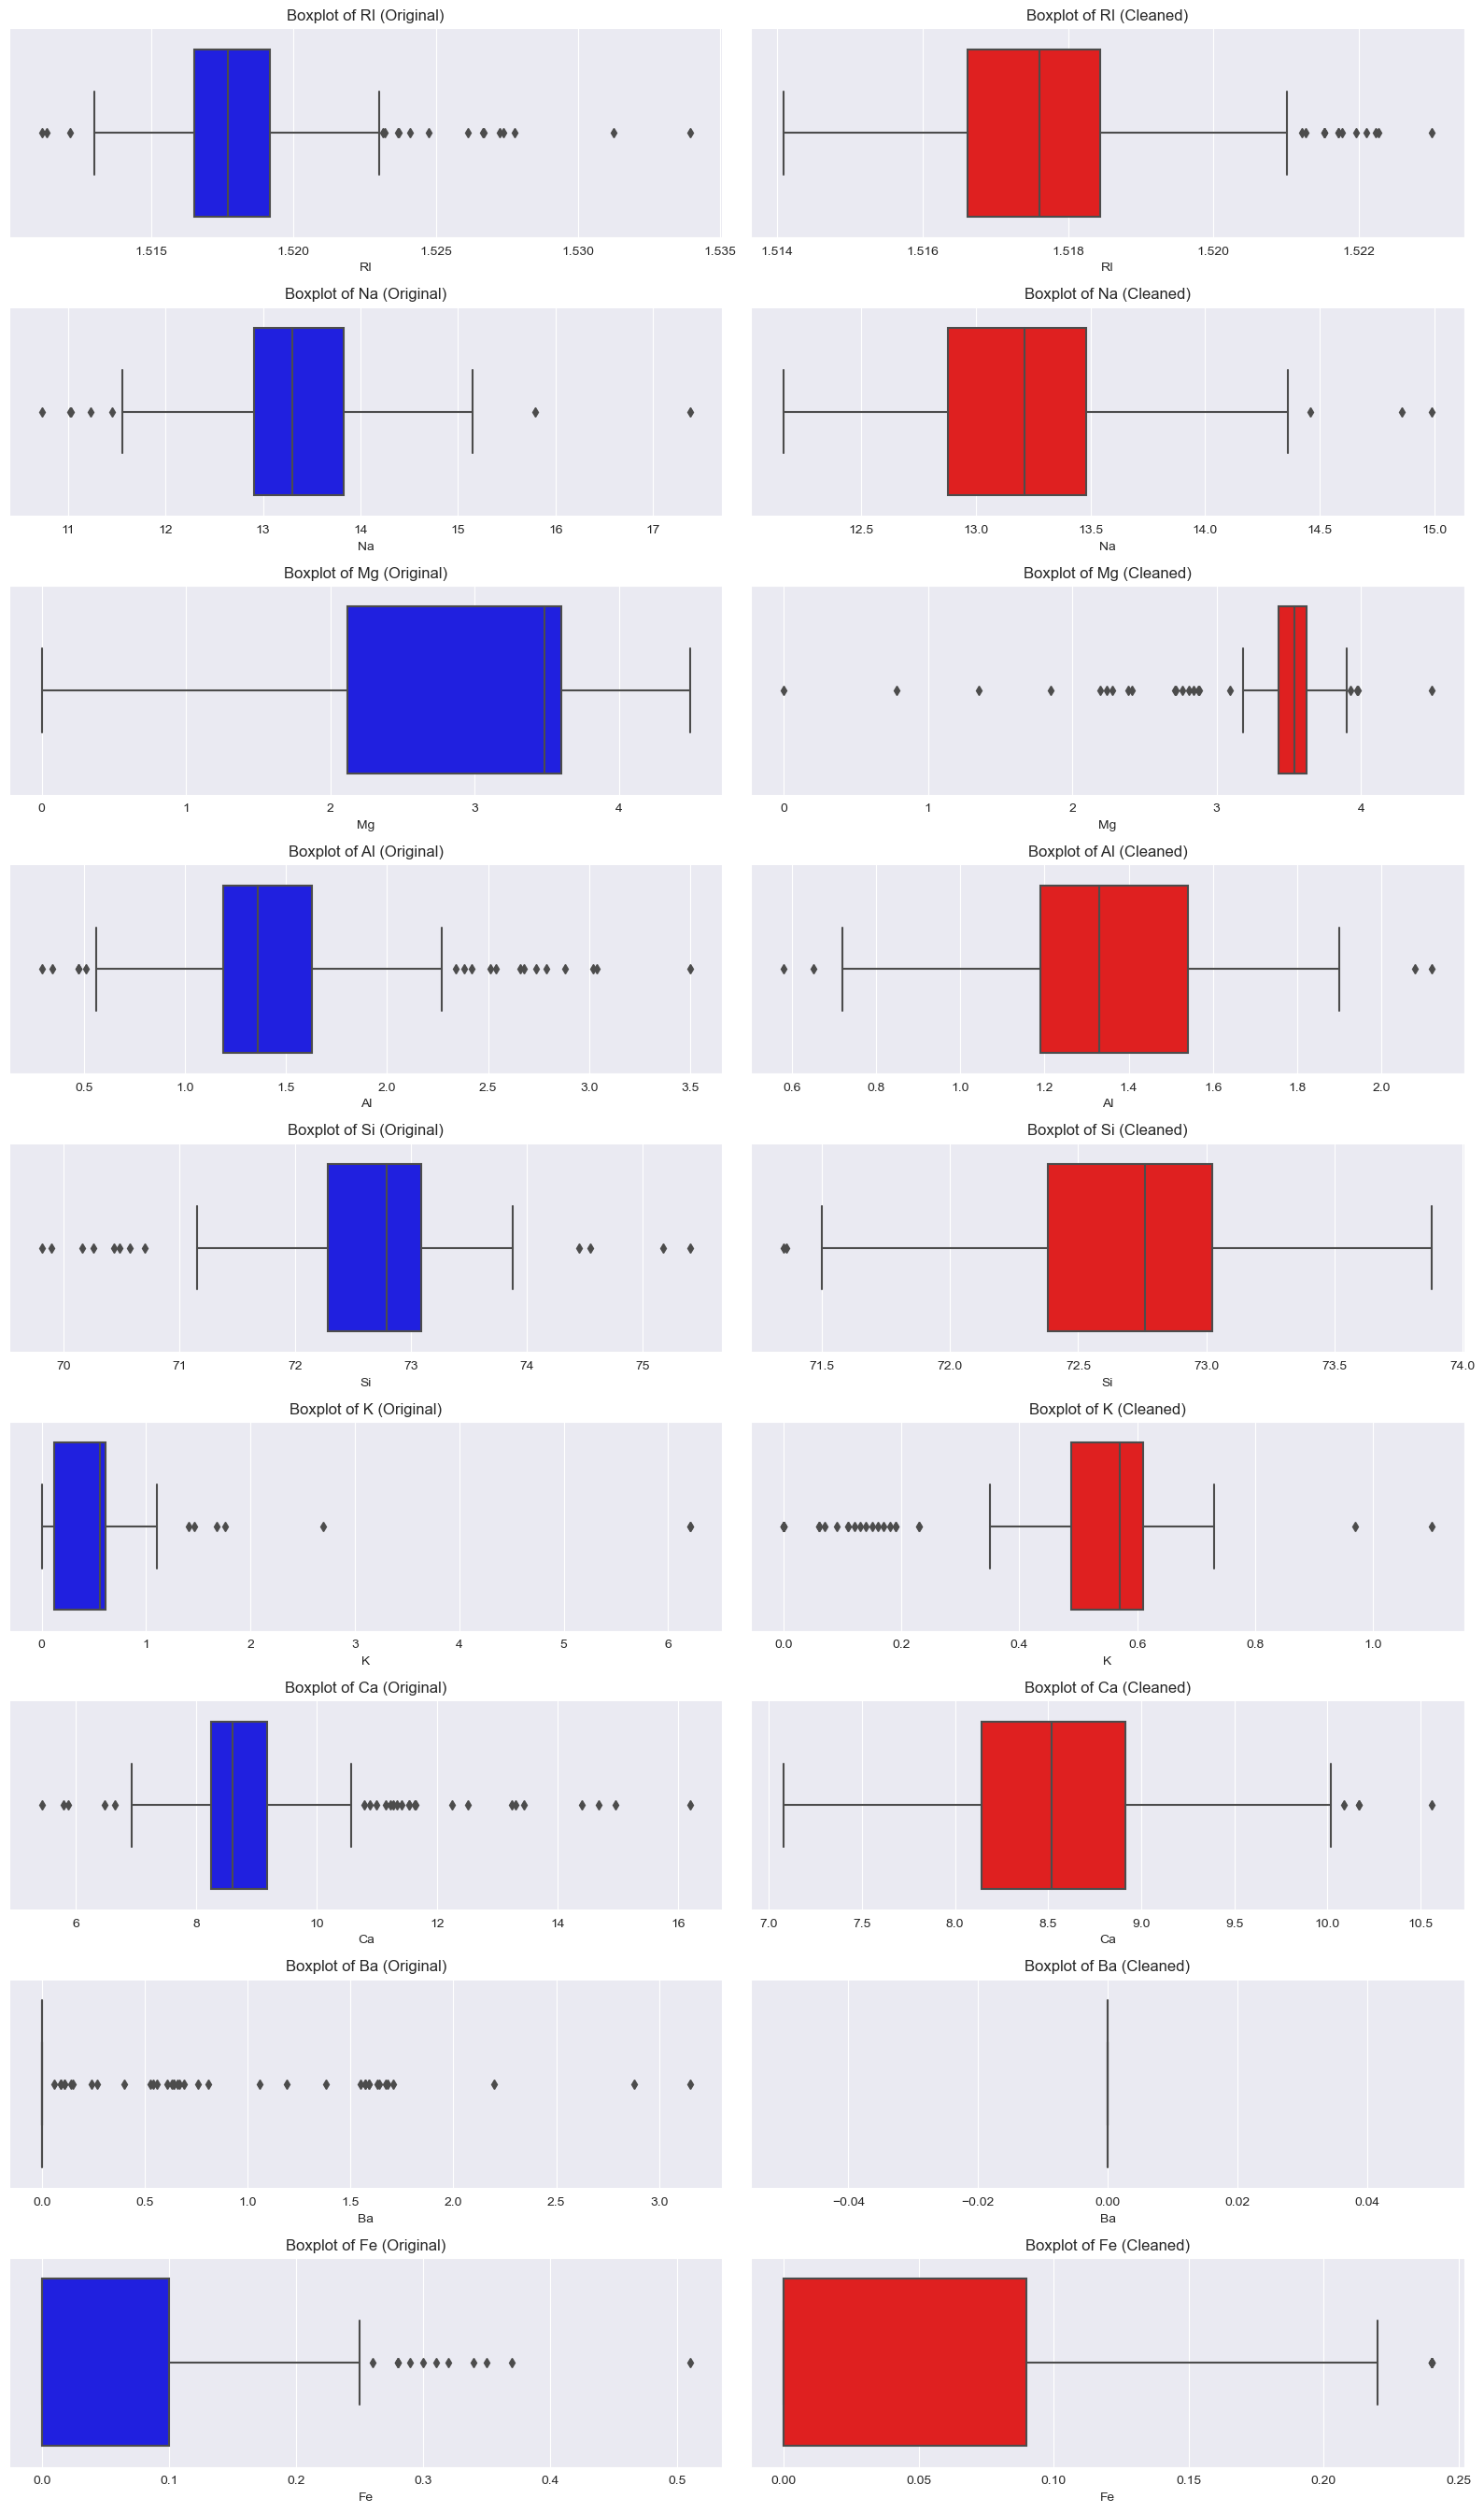

In [47]:
num_features = len(X_cleaned.columns)
fig, axes = plt.subplots(num_features, 2, figsize=(16, num_features * 3))

for i, feature in enumerate(X_cleaned.columns):
    sns.boxplot(data=X, x=feature, color='b', ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature} (Original)')

    sns.boxplot(data=X_cleaned, x=feature, color='r', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature} (Cleaned)')

plt.tight_layout()
plt.show()

In [48]:
data = {
    'Тип данных': ['Исходные данные (X)', 'Очищенные данные (X_cleaned)'],
    'Test': [acc_x_test, acc_xcl_test],
    'Train': [acc_x_train, acc_xcl_train]
}
print(pd.DataFrame(data))

                     Тип данных      Test  Train
0           Исходные данные (X)  0.744186    1.0
1  Очищенные данные (X_cleaned)  0.821429    1.0


Когда вы удалили выбросы, то accuracy стал немного больше на тестовой выборке. Но! У нас получилась еще более переобученная модель, это можно заметить по accuracy=1.0 в тренировочной выборке. К тому же у нас очень мало данных, удалять выбросы здесь не самая лучшая идея, так как данных становится совсем мало, как уже было сказано. Еще большой вес играет random state. Если изменить этот параметр, то и вывод может получиться другой, например при random_satate=42 у нас тестовая начальная выборка показывает лучшие результаты, чем уже очищенная новая тестовая выборка. Так получается из-за малого количества данных и некоторой 'случайности', которая становится важнее и важнее при уменьшении выборки. 